<a href="https://colab.research.google.com/github/sreejithag/DHPi_Data_Science_Bootcamp/blob/master/pandas_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Importing pandas*

In [0]:
import pandas as pd

*pandas Series and dataframes*

In [10]:
fruitsName = ['apple','orange','grape']
price = [100,40,50]

#series
print("Series")
fruitSeries = pd.Series(fruitsName)
print(fruitSeries)

#dataframe
print("\n\nDataFrame")
fruitDF = pd.DataFrame({"fruit":fruitsName,"price":price})
print(fruitDF)

Series
0     apple
1    orange
2     grape
dtype: object


DataFrame
    fruit  price
0   apple    100
1  orange     40
2   grape     50


Custom indexes

In [12]:
data = {
    'apples': [3, 2, 0, 1], 
    'oranges': [0, 3, 7, 2]
}

purchases = pd.DataFrame(data, index=['June', 'Robert', 'Lily', 'David'])
purchases


,apples,oranges
June,3,0
Robert,2,3
Lily,0,7
David,1,2


acessing using inedex

In [14]:
purchases.loc['Robert']

apples     2
oranges    3
Name: Robert, dtype: int64

reading data from csv

In [18]:
df = pd.read_csv('/content/drive/My Drive/UNdata_Export_20200605_104722418.csv')
df

,Country or Area,Year,Value
0,Australia,2017,5.541266e+05
1,Australia,2016,5.467718e+05
2,Australia,2015,5.351737e+05
3,Australia,2014,5.249571e+05
4,Australia,2013,5.304335e+05
...,...,...,...
1199,United States of America,1994,6.624836e+06
1200,United States of America,1993,6.532070e+06
1201,United States of America,1992,6.424934e+06
1202,United States of America,1991,6.315615e+06


converting DataFrame to csv

In [0]:
df.to_csv('test1.csv')

comman operations on dataframes

In [26]:
#print first 5 rows
print(df.head())

print("\n\n")
#print last 5 rows
print(df.tail())

print("\n\n\n")
#print custom number of rows from begining and from end

print(df.head(2))

print("\n\n")

print(df.tail(2))

  Country or Area  Year          Value
0       Australia  2017  554126.561371
1       Australia  2016  546771.759767
2       Australia  2015  535173.674335
3       Australia  2014  524957.101167
4       Australia  2013  530433.518839



               Country or Area  Year         Value
1199  United States of America  1994  6.624836e+06
1200  United States of America  1993  6.532070e+06
1201  United States of America  1992  6.424934e+06
1202  United States of America  1991  6.315615e+06
1203  United States of America  1990  6.371001e+06




  Country or Area  Year          Value
0       Australia  2017  554126.561371
1       Australia  2016  546771.759767



               Country or Area  Year         Value
1202  United States of America  1991  6.315615e+06
1203  United States of America  1990  6.371001e+06


In [27]:
#getting info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1204 entries, 0 to 1203
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  1204 non-null   object 
 1   Year             1204 non-null   int64  
 2   Value            1204 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 28.3+ KB


In [29]:
#getting the shape
df.shape

(1204, 3)

In [33]:
# dropping duplicates

#create duplicate in df

tempdf = df.append(df)
print(tempdf.shape)

tempdf = tempdf.drop_duplicates()
print(tempdf.shape)

#to avoid assigning use inplace
tempdf.drop_duplicates(inplace=True)

(2408, 3)
(1204, 3)


In [35]:
#get list of column names

df.columns

Index(['Country or Area', 'Year', 'Value'], dtype='object')

In [43]:
#rename columns

df.rename(columns={
    'values': 'Value'
},inplace=True)

df.columns

Index(['Country or Area', 'Year', 'Value'], dtype='object')

In [45]:
#change column names to all lowercase 

df.columns = [col.lower() for col in df]
df.columns

Index(['country or area', 'year', 'value'], dtype='object')

Working with missing values

  








In [46]:
#check Dataframe contains null values or not
df.isnull()

,country or area,year,value
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
1199,False,False,False
1200,False,False,False
1201,False,False,False
1202,False,False,False


In [47]:
#To count the number of nulls in each column we use an aggregate function for summing

df.isnull().sum()

country or area    0
year               0
value              0
dtype: int64

In [0]:
#removing null values 

df.dropna() #will drop all rows which contains atleast one null value it will return a new DataFrame so to work on the same one use inplace = True 
df.dropna(axis=1) #will drop the columns which contains a null value

In [50]:
#selcting a column to a series

years = df['year']
years

0       2017
1       2016
2       2015
3       2014
4       2013
        ... 
1199    1994
1200    1993
1201    1992
1202    1991
1203    1990
Name: year, Length: 1204, dtype: int64

In [52]:
#finding mean of series 

years_mean = years.mean()
years_mean

2003.5

In [0]:
#filling values at places of null

df.fillna(years_mean,inplace= True)

In [54]:
#summary of the distribution of continuous variables

df.describe()

,year,value
count,1204.000000,1.204000e+03
mean,2003.500000,5.280785e+05
std,8.081104,1.283749e+06
min,1990.000000,8.412655e+01
25%,1996.750000,3.093901e+04
50%,2003.500000,8.069707e+04
75%,2010.250000,4.392478e+05
max,2017.000000,7.369968e+06


In [63]:
#in cateogical variable describe will provide counts and diffrent details

df['country_or_area'].describe()


count         1204
unique          43
top       Slovenia
freq            28
Name: country_or_area, dtype: object

In [64]:
#frequency of all values in a column
df['country_or_area'].value_counts()


Slovenia                    28
Turkey                      28
New Zealand                 28
Monaco                      28
Cyprus                      28
Lithuania                   28
Spain                       28
Estonia                     28
Sweden                      28
Slovakia                    28
Italy                       28
United States of America    28
Japan                       28
Belarus                     28
Finland                     28
Greece                      28
Poland                      28
Romania                     28
Canada                      28
Croatia                     28
Iceland                     28
Denmark                     28
Russian Federation          28
Australia                   28
Ukraine                     28
Switzerland                 28
Czechia                     28
Bulgaria                    28
Luxembourg                  28
Netherlands                 28
United Kingdom              28
France                      28
Hungary 

In [65]:
#find Relationships between continuous variables

df.corr()

,year,value
year,1.000000,-0.014456
value,-0.014456,1.000000


DataFrame slicing, selecting, extracting

In [66]:
#using column names
df['year']

0       2017
1       2016
2       2015
3       2014
4       2013
        ... 
1199    1994
1200    1993
1201    1992
1202    1991
1203    1990
Name: year, Length: 1204, dtype: int64

In [69]:
#get a column or columns as a DataFrame

colDF = df[['year','value']]
colDF

,year,value
0,2017,5.541266e+05
1,2016,5.467718e+05
2,2015,5.351737e+05
3,2014,5.249571e+05
4,2013,5.304335e+05
...,...,...
1199,1994,6.624836e+06
1200,1993,6.532070e+06
1201,1992,6.424934e+06
1202,1991,6.315615e+06


In [71]:
#by location name
df.loc[9]


#by python style indexing
df.iloc[10]

country_or_area    Australia
year                    2007
value                 533138
Name: 10, dtype: object

In [76]:
df.loc[0:7]

,country_or_area,year,value
0,Australia,2017,554126.561371
1,Australia,2016,546771.759767
2,Australia,2015,535173.674335
3,Australia,2014,524957.101167
4,Australia,2013,530433.518839
5,Australia,2012,540615.864772
6,Australia,2011,538280.611349
7,Australia,2010,537275.249361


In [79]:
#conditional selection

df[df['year']==2013]

,country_or_area,year,value
4,Australia,2013,5.304335e+05
32,Austria,2013,8.035253e+04
60,Belarus,2013,9.536361e+04
88,Belgium,2013,1.193044e+05
116,Bulgaria,2013,5.551283e+04
144,Canada,2013,7.220628e+05
172,Croatia,2013,2.455454e+04
200,Cyprus,2013,7.843026e+03
228,Czechia,2013,1.286911e+05
256,Denmark,2013,5.602137e+04


In [81]:
#using isin
df[df['year'].isin([2003,2012])]

,country_or_area,year,value
5,Australia,2012,5.406159e+05
14,Australia,2003,4.981190e+05
33,Austria,2012,7.981132e+04
42,Austria,2003,9.178839e+04
61,Belarus,2012,9.427116e+04
...,...,...,...
1134,Ukraine,2003,4.383316e+05
1153,United Kingdom,2012,5.836525e+05
1162,United Kingdom,2003,7.062050e+05
1181,United States of America,2012,6.545969e+06


In [83]:
#using with functions

def yearup(x):
  if x >= 2005:
    return "old"
  else:
    return "new"


df['yearcat'] = df['year'].apply(yearup)
df

,country_or_area,year,value,yearcat
0,Australia,2017,5.541266e+05,old
1,Australia,2016,5.467718e+05,old
2,Australia,2015,5.351737e+05,old
3,Australia,2014,5.249571e+05,old
4,Australia,2013,5.304335e+05,old
...,...,...,...,...
1199,United States of America,1994,6.624836e+06,new
1200,United States of America,1993,6.532070e+06,new
1201,United States of America,1992,6.424934e+06,new
1202,United States of America,1991,6.315615e+06,new


Visualization

import matplotlib

In [0]:
import matplotlib.pyplot as plt

In [0]:
plt.rcParams.update({'font.size': 20, 'figure.figsize': (10, 8)}) # set font and plot size to be larger


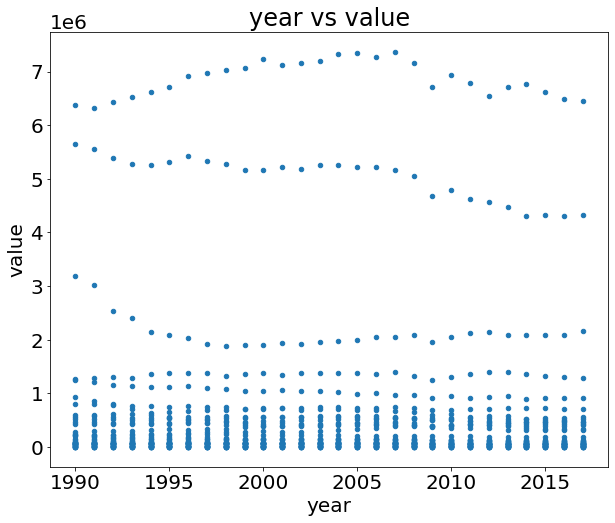

In [93]:
df.plot(kind='scatter', x='year',y='value',title='year vs value');

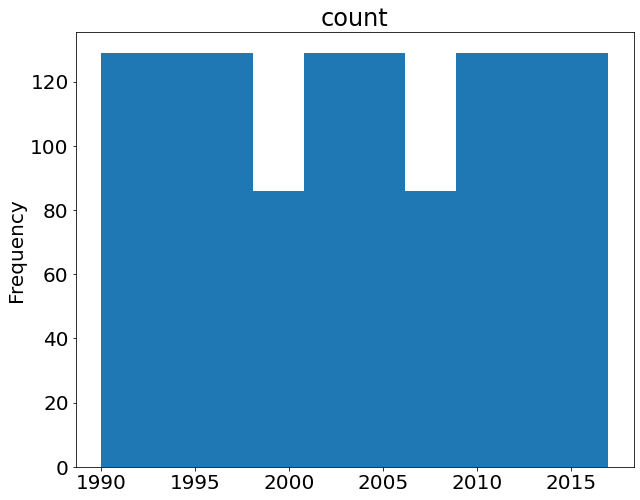

In [94]:
df['year'].plot(kind='hist',title='count');

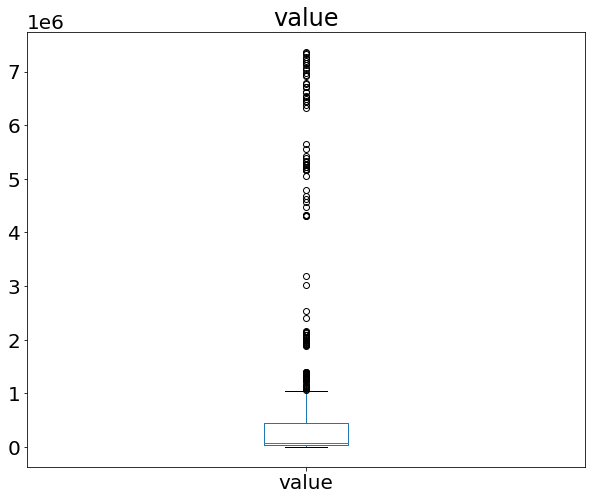

In [95]:
df['value'].plot(kind='box',title='value');

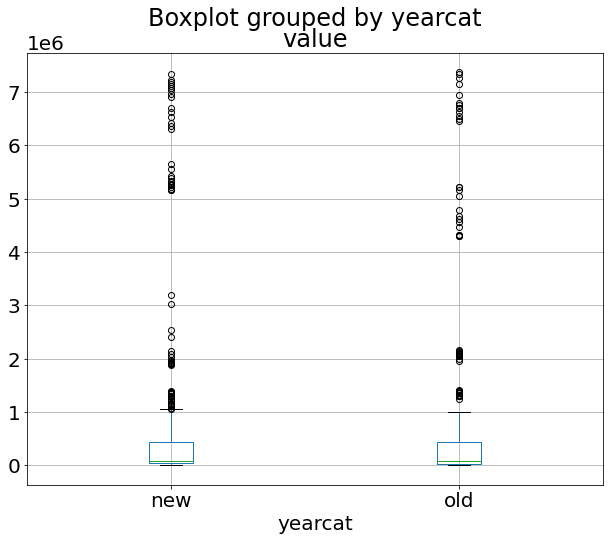

In [98]:
df.boxplot(column='value',by='yearcat');